In [1]:
!pip install pyspark #must have java jdk
!pip install koalas

In [19]:
import pandas as pd
import databricks.koalas as ks
from pyspark.sql import SparkSession
import time
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
%timeit df_pandas = pd.read_csv("/Users/Chris/Downloads/all_stocks_5yr.csv")

487 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit df_koalas = ks.read_csv("/Users/Chris/Downloads/all_stocks_5yr.csv")

1.35 s ± 404 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit df_pyspark = spark.read.csv("/Users/Chris/Downloads/all_stocks_5yr.csv", header=True)

266 ms ± 92.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
df_pandas = pd.read_csv("/Users/Chris/Downloads/all_stocks_5yr.csv")
df_koalas = ks.read_csv("/Users/Chris/Downloads/all_stocks_5yr.csv")
df_pyspark = spark.read.csv("/Users/Chris/Downloads/all_stocks_5yr.csv", header=True)

In [8]:
len(df_pandas)

619040

In [9]:
df_pandas.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
df_koalas.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
df_pyspark.show(5)

+----------+-----+-----+-----+-----+--------+----+
|      date| open| high|  low|close|  volume|Name|
+----------+-----+-----+-----+-----+--------+----+
|2013-02-08|15.07|15.12|14.63|14.75| 8407500| AAL|
|2013-02-11|14.89|15.01|14.26|14.46| 8882000| AAL|
|2013-02-12|14.45|14.51| 14.1|14.27| 8126000| AAL|
|2013-02-13| 14.3|14.94|14.25|14.66|10259500| AAL|
|2013-02-14|14.94|14.96|13.16|13.99|31879900| AAL|
+----------+-----+-----+-----+-----+--------+----+
only showing top 5 rows



In [12]:
num_iter = 5

In [13]:
j=0
results = []
while j < num_iter:
    print('Dataframe length:', len(df_pandas))
    t0= time.time()
    df_pandas.groupby('Name').mean()
    t1= time.time()
    print('Pandas Groupby Time = {:0.3f} seconds'.format(t1-t0))
    t2 = time.time()
    df_pandas = pd.concat([df_pandas, df_pandas], ignore_index=True)
    t3 = time.time()
    print('Pandas Concat Time = {:0.3f} seconds'.format(t3-t2))
    j=j+1
    print('====================================================')
    results.append(['pandas',t3-t2,t1-t0,len(df_pandas)])


Dataframe length: 619040
Pandas Groupby Time = 0.098 seconds
Pandas Concat Time = 0.083 seconds
Dataframe length: 1238080
Pandas Groupby Time = 0.218 seconds
Pandas Concat Time = 0.156 seconds
Dataframe length: 2476160
Pandas Groupby Time = 0.335 seconds
Pandas Concat Time = 0.309 seconds
Dataframe length: 4952320
Pandas Groupby Time = 0.956 seconds
Pandas Concat Time = 0.823 seconds
Dataframe length: 9904640
Pandas Groupby Time = 1.455 seconds
Pandas Concat Time = 1.588 seconds


In [14]:
j=0

while j < num_iter:
    print('Dataframe length:', len(df_koalas))
    t0= time.time()
    df_koalas.groupby('Name').mean()
    t1= time.time()
    print('Koalas Groupby Time = {:0.3f} seconds'.format(t1-t0))
    t2 = time.time()
    df_koalas = ks.concat([df_koalas, df_koalas], ignore_index=True)
    t3 = time.time()
    print('Koalas Concat Time = {:0.3f} seconds'.format(t3-t2))
    j=j+1
    print('====================================================')
    results.append(['koalas',t3-t2,t1-t0,len(df_koalas)])


Dataframe length: 619040
Koalas Groupby Time = 0.432 seconds
Koalas Concat Time = 0.213 seconds
Dataframe length: 1238080
Koalas Groupby Time = 0.206 seconds
Koalas Concat Time = 0.098 seconds
Dataframe length: 2476160
Koalas Groupby Time = 0.202 seconds
Koalas Concat Time = 0.089 seconds
Dataframe length: 4952320
Koalas Groupby Time = 0.186 seconds
Koalas Concat Time = 0.112 seconds
Dataframe length: 9904640
Koalas Groupby Time = 0.220 seconds
Koalas Concat Time = 0.121 seconds


In [15]:
j=0
while j < num_iter:
    print('Dataframe length:', df_pyspark.count())
    t0= time.time()
    df_pyspark.groupby('Name').mean() 
    t1= time.time()
    print('PySpark Groupby Time = {:0.3f} seconds'.format(t1-t0))
    t2 = time.time()
    df_pyspark = df_pyspark.union(df_pyspark)
    t3 = time.time()
    print('PySpark Concat Time = {:0.3f} seconds'.format(t3-t2))
    j=j+1
    print('====================================================')
    results.append(['pyspark',t3-t2,t1-t0,df_pyspark.count()])


Dataframe length: 619040
PySpark Groupby Time = 0.015 seconds
PySpark Concat Time = 0.003 seconds
Dataframe length: 1238080
PySpark Groupby Time = 0.036 seconds
PySpark Concat Time = 0.008 seconds
Dataframe length: 2476160
PySpark Groupby Time = 0.008 seconds
PySpark Concat Time = 0.009 seconds
Dataframe length: 4952320
PySpark Groupby Time = 0.010 seconds
PySpark Concat Time = 0.013 seconds
Dataframe length: 9904640
PySpark Groupby Time = 0.009 seconds
PySpark Concat Time = 0.021 seconds


In [16]:
df_results = pd.DataFrame(results, columns=['package','concat_time','groupby_time','df_length'])
df_results

,package,concat_time,groupby_time,df_length
0,pandas,0.082654,0.098229,1238080
1,pandas,0.155611,0.217903,2476160
2,pandas,0.308549,0.334641,4952320
3,pandas,0.823467,0.955979,9904640
4,pandas,1.588287,1.454501,19809280
5,koalas,0.212563,0.432352,1238080
6,koalas,0.098198,0.206125,2476160
7,koalas,0.089141,0.202226,4952320
8,koalas,0.111909,0.186253,9904640
9,koalas,0.121401,0.220440,19809280


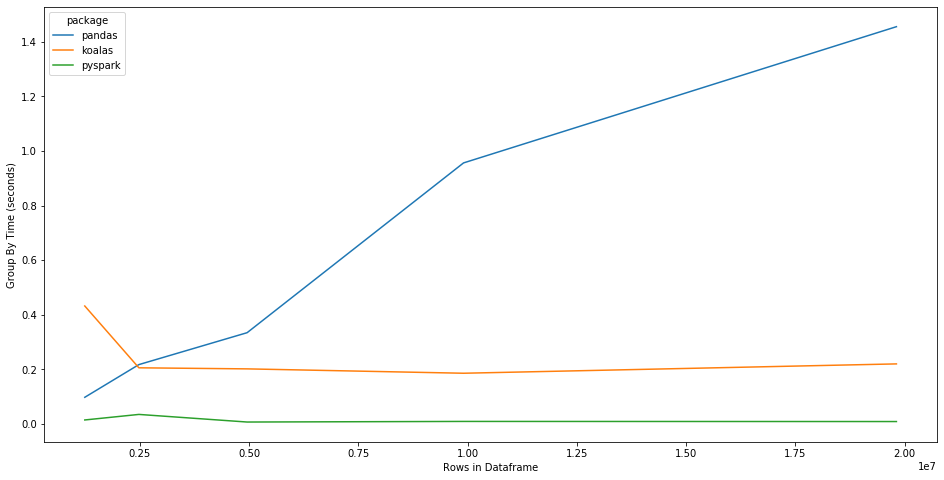

In [17]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=df_results, x="df_length", y="groupby_time", hue="package")
ax.set(xlabel='Rows in Dataframe', ylabel='Group By Time (seconds)')
plt.show()

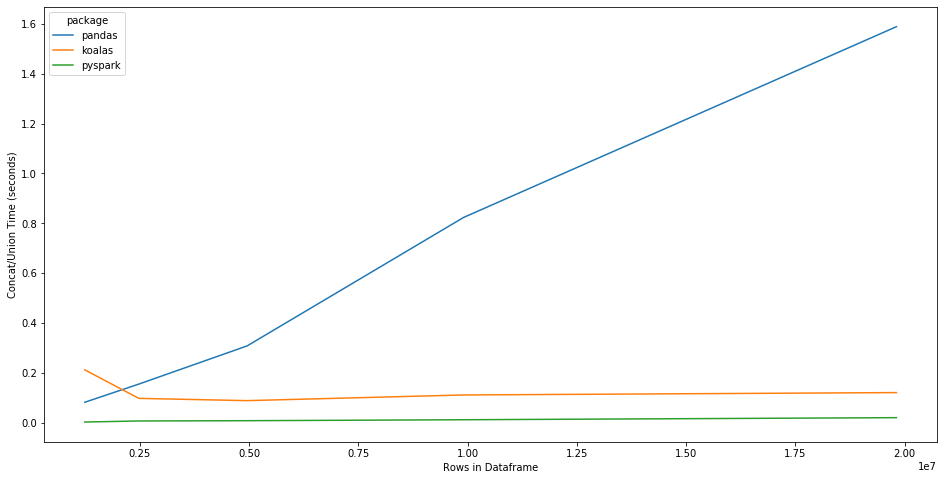

In [18]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(data=df_results, x="df_length", y="concat_time", hue="package")
ax.set(xlabel='Rows in Dataframe', ylabel='Concat/Union Time (seconds)')
plt.show()